# Manhattan plot for each IPF variant separately

/Users/alireza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


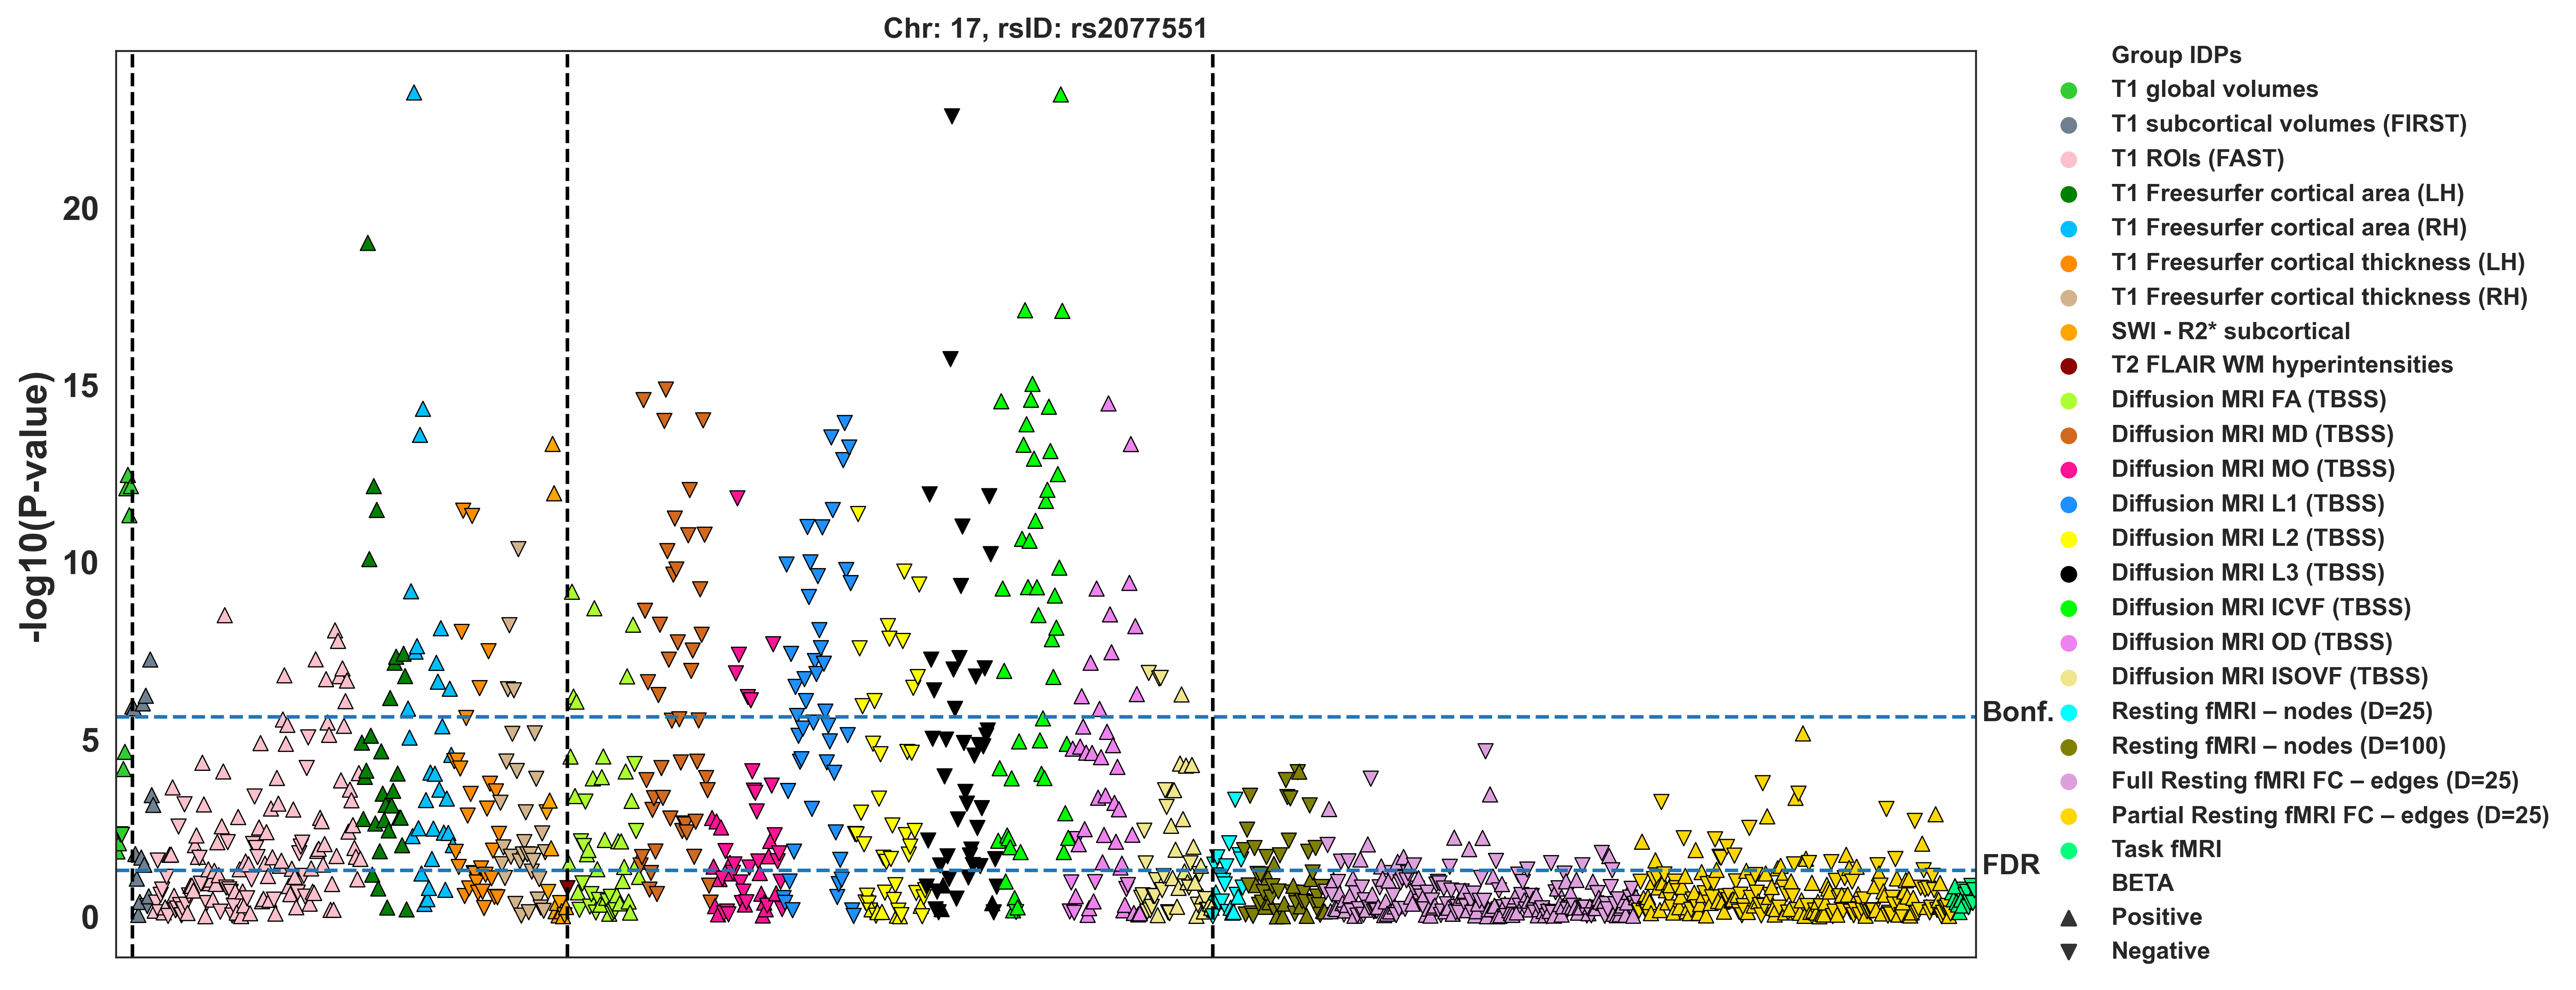

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from scipy.io import loadmat
import os

sns.set_style('white')

# Select the varint number
VAR = "15"

cwd = os.getcwd()
Data_path = cwd + "/data"

data = np.loadtxt(open(Data_path + "/IPF_" + VAR.zfill(2) + ".txt", "rb"), delimiter="\t")
df = pd.DataFrame(data, columns = ['BETA' , 'T_STAT' , 'UNADJ' , 'GC' , 'BONF' , 'HOLM' , 'SIDAK_SS' , 'SIDAK_SD' , 'FDR_BH' , 'FDR_BY'])

data = pd.read_csv(Data_path + "/Ind_type.txt", header=None)
df['Group IDPs'] = data
df['ind'] = range(len(df))
df['log10_UNADJ'] = -np.log10(df['UNADJ'])

pos = (df['BETA'] >= 0)
neg = (df['BETA'] < 0)

df['BETA'] = np.where(pos == True, "Positive", df['BETA'])
df['BETA'] = np.where(neg == True, "Negative", df['BETA'])

data = pd.read_csv(Data_path + "/coloc_" + VAR.zfill(2) + ".txt", header=None)
df['colocalised'] = data

fig = plt.figure(num=None, figsize=(14, 7), dpi=400, facecolor='w', edgecolor='k')

color_list = ['limegreen','slategrey','pink','green','deepskyblue','darkorange','tan','orange','darkred','greenyellow','chocolate','deeppink','dodgerblue','yellow','black','lime','violet','khaki','cyan','olive','plum','gold','springgreen']
colors     = ['limegreen','slategrey','pink','green','deepskyblue','yellow','darkred','lime','blue','black','red','darkblue','orange','khaki','gold','purple','olive']
colors = color_list[0 : 23]
markers = {"Positive": "^", "Negative": "v"}

ax = sns.scatterplot(x="ind", 
                     y="log10_UNADJ", 
                     data=df, 
                     hue="Group IDPs", 
                     style="BETA",
                     markers=markers,
                     palette=colors, 
                     legend='full', 
                     linewidth=0.5 * df['colocalised'],
                     edgecolor='black',
                     s=40,                     
                    )

ax.set_xlim([0, len(df)])

if VAR == "1" :
    ax.axes.set_title("Chr: 03, rsID: rs78238620",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-03_rsID-rs78238620.png"
elif VAR == "2" :
    ax.axes.set_title("Chr: 03, rsID: rs12696304",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-03_rsID-rs12696304.png"
elif VAR == "3" :
    ax.axes.set_title("Chr: 04, rsID: rs2013701",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-04_rsID-rs2013701.png"
elif VAR == "4" :
    ax.axes.set_title("Chr: 05, rsID: rs7725218",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-05_rsID-rs7725218.png"
elif VAR == "5" :
    ax.axes.set_title("Chr: 05, rsID: rs116483731",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-05_rsID-rs116483731.png"
elif VAR == "6" :
    ax.axes.set_title("Chr: 06, rsID: rs2076295",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-06_rsID-rs2076295.png"
elif VAR == "7" :
    ax.axes.set_title("Chr: 07, rsID: rs12699415",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-07_rsID-rs12699415.png"
elif VAR == "8" :
    ax.axes.set_title("Chr: 07, rsID: rs2897075",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-07_rsID-rs2897075.png"
elif VAR == "9" :
    ax.axes.set_title("Chr: 08, rsID: rs28513081",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-08_rsID-rs28513081.png"
elif VAR == "10" :
    ax.axes.set_title("Chr: 10, rsID: rs537322302",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-10_rsID-rs537322302.png"
elif VAR == "11" :
    ax.axes.set_title("Chr: 11, rsID: rs35705950",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-11_rsID-rs35705950.png"
elif VAR == "12" :
    ax.axes.set_title("Chr: 13, rsID: rs9577395",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-13_rsID-rs9577395.png"
elif VAR == "13" :
    ax.axes.set_title("Chr: 15, rsID: rs59424629",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-15_rsID-rs59424629.png"
elif VAR == "14" :
    ax.axes.set_title("Chr: 15, rsID: rs62023891",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-15_rsID-rs62023891.png"
elif VAR == "15" :
    ax.axes.set_title("Chr: 17, rsID: rs2077551",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-17_rsID-rs2077551.png"
elif VAR == "16" :
    ax.axes.set_title("Chr: 19, rsID: rs12610495",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-19_rsID-rs12610495.png"
elif VAR == "17" :
    ax.axes.set_title("Chr: 20, rsID: rs41308092",fontsize=12, weight='bold')
    FigPath=Data_path + "/Figs/Chr-20_rsID-rs41308092.png"


ax.axhline(-np.log10(0.05 / (17 * len(df))), ls='--')
ax.text(len(df) + 4 , -np.log10(0.05 / (17 * len(df))) - 0.10, "Bonf.", fontsize=12, weight='bold')

ax.axhline(-np.log10(0.05), ls='--')
ax.text(len(df) + 4 , -np.log10(0.05) - 0.10, "FDR", fontsize=12, weight='bold')

ax.set(xticklabels=[])
plt.yticks(fontsize=14, weight='bold')
plt.ylabel("-log10(P-value)",fontsize=16, weight='bold')
plt.xlabel("")


ax.legend(
          loc='upper right', 
          bbox_to_anchor=(1.32, 1.03), 
          frameon=False
         )

plt.setp(ax.get_legend().get_texts(), fontsize='10', weight='bold') # for legend text

plt.axvline(x=11.0, color='k', linestyle='--')
plt.axvline(x=303.0, color='k', linestyle='--')
plt.axvline(x=736.0, color='k', linestyle='--')
plt.show(ax)
